In [1]:
import os 
import requests

In [2]:
pdf_path = "world_geo.pdf"
if not os.path.exists(pdf_path):
    print('[INFO] The file does not exist, Downloading...')
    url  = "https://www.iipa.org.in/upload/world_geo.pdf"
    filename = pdf_path 
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as file:
            file.write(response.content)
            print(f"[INFO] The file has been downloaded as  {filename}")
    else:
        print(f"[INFO] Failed to download the file. Status Code: {response.status_code}")
else:
    print("[INFO] File {pdf_path} already exists.")

[INFO] File {pdf_path} already exists.


PREPROCESS 

In [3]:
import fitz 
from tqdm.auto import tqdm 

def text_formatter(text: str) -> str:
    cleaned_text = text.replace("\n", "").strip()
    return cleaned_text 

def o_r_pdf(pdf_path: str) -> list[dict]:
    doc = fitz.open(pdf_path)
    pages_and_text = []
    for page_number, page in tqdm(enumerate(doc)):
        text = page.get_text()
        text = text_formatter(text=text)
        pages_and_text.append({"page_number": page_number,
        "page_char_count" : len(text),
        "page_word_count" : len(text.split(" ")),
        "page_sentence_count" : len(text.split(". ")),
        "page_token_count" : len(text) / 4,
        "text": text}) # One token = 4 characters

    return pages_and_text

pages_and_text = o_r_pdf(pdf_path = pdf_path)
pages_and_text[:2]

0it [00:00, ?it/s]

[{'page_number': 0,
  'page_char_count': 80,
  'page_word_count': 20,
  'page_sentence_count': 1,
  'page_token_count': 20.0,
  'text': '1      IIPA2022  22 World Geography  Short Answers PKP-03 by Dr Amit Kumar Singh'},
 {'page_number': 1,
  'page_char_count': 4596,
  'page_word_count': 163,
  'page_sentence_count': 43,
  'page_token_count': 1149.0,
  'text': '2  Contents 1.  Origin of Solar System and Sun ........................................................................................................... 6 2. Stars, Sun & Planets ............................................................................................................................. 8 Sun Statistics ....................................................................................................................................... 8 Solar Eclipse ........................................................................................................................................ 9 Lunar Eclipse .......

In [4]:
import random 

random.sample(pages_and_text, k=3)

[{'page_number': 59,
  'page_char_count': 1195,
  'page_word_count': 216,
  'page_sentence_count': 10,
  'page_token_count': 298.75,
  'text': '60  16. Bottom topography of the Atlantic Oceans  Atlantic Ocean The Atlantic Ocean located between North and South Americas in the west and Europe and Africa in the east covers an area of 82,000,000 km2 which is 1/6th of the geographical area of the globe and half of the area of the Pacific Ocean. The ‘S’ shape of the ocean indicates the fact that landmasses (continents) on its either side were once a contiguous part. The Atlantic Ocean was formed due to drifting of North and South Americas to the west due to plate tectonics. The ocean widens to the south of equator and attains the maximum width of 5,920 km at 35°S latitude. It narrows down towards the equator. It is only 2560 km wide between Liberian coast and Cape Sao Roque. The width further increases northward and it becomes 4800 km at 40°N latitude. It narrows down in the extreme north wh

In [5]:
import pandas as pd 

df = pd.DataFrame(pages_and_text)
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count,page_token_count,text
0,0,80,20,1,20.0,1 IIPA2022 22 World Geography Short Ans...
1,1,4596,163,43,1149.0,2 Contents 1. Origin of Solar System and Sun...
2,2,4448,208,40,1112.0,3 Types of Volcanoes ...........................
3,3,4560,203,44,1140.0,4 Continental Slope ............................
4,4,3474,178,31,868.5,5 Insolation or Incoming Solar Radiation .......


In [6]:
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count,page_token_count
count,129.00,129.00,129.00,129.00,129.00
mean,64.00,1655.45,262.89,16.95,413.86
std,37.38,732.36,96.85,7.75,183.09
min,0.00,80.00,20.00,1.00,20.00
25%,32.00,1146.00,189.00,12.00,286.50
50%,64.00,1699.00,264.00,16.00,424.75
75%,96.00,2055.00,341.00,21.00,513.75
max,128.00,4596.00,424.00,44.00,1149.00


In [7]:
from spacy.lang.en import English

nlp = English()
#Adding a sentencizer pipeline
nlp.add_pipe("sentencizer")

#Creating a documnet instance as an example

doc = nlp("I am a shitty person. I am a good man. I am ugly.")
assert len(list(doc.sents)) == 3

list(doc.sents)


[I am a shitty person., I am a good man., I am ugly.]

In [8]:
pages_and_text[0]

{'page_number': 0,
 'page_char_count': 80,
 'page_word_count': 20,
 'page_sentence_count': 1,
 'page_token_count': 20.0,
 'text': '1      IIPA2022  22 World Geography  Short Answers PKP-03 by Dr Amit Kumar Singh'}

In [9]:
for item in tqdm(pages_and_text):
    item["sentences"] = list(nlp(item["text"]).sents)

    item["sentences"] = [str(sentence) for sentence in item["sentences"]]

    item["page_sentence_count_spacy"] = len(item["sentences"])


  0%|          | 0/129 [00:00<?, ?it/s]

In [10]:
random.sample(pages_and_text, k=1)

[{'page_number': 19,
  'page_char_count': 1344,
  'page_word_count': 216,
  'page_sentence_count': 14,
  'page_token_count': 336.0,
  'text': '20  Forces of Compression: Forces of compression are the forces which push rock strata against a hard plane from one side or from both sides. The compressional forces lead to the bending of rock layers and thus lead to the formation of Fold Mountains. Most of the great mountain chains of the world like the Himalayas, the Rockies (N. America), the Andes (S. America), the Alps (Europe) etc are formed in this manner. Exogenic Forces Exogenic forces are those forces which derive their strength from the earth’s exterior or are originated within the earth’s atmosphere. Examples of forces – the wind, waves, water etc. Examples of exogenic processes – weathering, mass movement, erosion, deposition. Exogenic forces are mainly land wearing forces. Exogenic forces can take the form of weathering, erosion, and deposition. Weathering is the breaking of rocks

In [11]:
df = pd.DataFrame(pages_and_text)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count,page_token_count,page_sentence_count_spacy
count,129.00,129.00,129.00,129.00,129.00,129.00
mean,64.00,1655.45,262.89,16.95,413.86,15.51
std,37.38,732.36,96.85,7.75,183.09,6.25
min,0.00,80.00,20.00,1.00,20.00,1.00
25%,32.00,1146.00,189.00,12.00,286.50,10.00
50%,64.00,1699.00,264.00,16.00,424.75,16.00
75%,96.00,2055.00,341.00,21.00,513.75,20.00
max,128.00,4596.00,424.00,44.00,1149.00,31.00


CHUNKING : Splitting sentecnces in groups of 10 or less

In [12]:
num_sentence_chunk_size = 10 
def split_list(input_list: list, slice_size: int = num_sentence_chunk_size) -> list[list[str]]:
    return [input_list[i:i+slice_size] for i in range(0, len(input_list), slice_size)]

text_list = list(range(70))
split_list(text_list)


[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
 [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 61, 62, 63, 64, 65, 66, 67, 68, 69]]

In [13]:
for item in tqdm(pages_and_text):
    item["sentence_chunks"] = split_list(input_list=item["sentences"], slice_size=num_sentence_chunk_size)
    item["num_chunks"] = len(item["sentence_chunks"])

  0%|          | 0/129 [00:00<?, ?it/s]

In [14]:
random.sample(pages_and_text, k = 1)

[{'page_number': 59,
  'page_char_count': 1195,
  'page_word_count': 216,
  'page_sentence_count': 10,
  'page_token_count': 298.75,
  'text': '60  16. Bottom topography of the Atlantic Oceans  Atlantic Ocean The Atlantic Ocean located between North and South Americas in the west and Europe and Africa in the east covers an area of 82,000,000 km2 which is 1/6th of the geographical area of the globe and half of the area of the Pacific Ocean. The ‘S’ shape of the ocean indicates the fact that landmasses (continents) on its either side were once a contiguous part. The Atlantic Ocean was formed due to drifting of North and South Americas to the west due to plate tectonics. The ocean widens to the south of equator and attains the maximum width of 5,920 km at 35°S latitude. It narrows down towards the equator. It is only 2560 km wide between Liberian coast and Cape Sao Roque. The width further increases northward and it becomes 4800 km at 40°N latitude. It narrows down in the extreme north wh

In [15]:
df = pd.DataFrame(pages_and_text)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count,page_token_count,page_sentence_count_spacy,num_chunks
count,129.00,129.00,129.00,129.00,129.00,129.00,129.00
mean,64.00,1655.45,262.89,16.95,413.86,15.51,1.97
std,37.38,732.36,96.85,7.75,183.09,6.25,0.71
min,0.00,80.00,20.00,1.00,20.00,1.00,1.00
25%,32.00,1146.00,189.00,12.00,286.50,10.00,1.00
50%,64.00,1699.00,264.00,16.00,424.75,16.00,2.00
75%,96.00,2055.00,341.00,21.00,513.75,20.00,2.00
max,128.00,4596.00,424.00,44.00,1149.00,31.00,4.00


In [16]:
import re 

pages_and_chunks = []
for item in tqdm(pages_and_text):
    for sentence_chunk in item["sentence_chunks"]:
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_number"]

        # join the sentences together into paragraph like structure aka join the list of sentences into one paragraph 

        joined_sentence_chunk = "".join(sentence_chunk).replace("  "," ").strip()
        joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk)

        chunk_dict["sentence_chunk"] = joined_sentence_chunk

        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk) / 4

        pages_and_chunks.append(chunk_dict)

len(pages_and_chunks)

  0%|          | 0/129 [00:00<?, ?it/s]

254

In [17]:
random.sample(pages_and_chunks, k=1)

[{'page_number': 5,
  'sentence_chunk': 'The enormous planets Jupiter and Saturn, which are far from the sun and have powerful gravitational fields, did, nevertheless, draw and hold thick gaseous atmospheres of Hydrogen and Helium. Another group of Scientists believe that the Sun has been formed from a moving cloud of gases, which is called Nebula. The Sun and the planets were born out of this cloud. The force of gravity has created them. For over millions of years, these balls of dust and gas are moving around the Sun. The Sun by virtue of its mass and weight, controls the movement of the planets. This force is called the force of gravity. Till 2006, there were nine planets in the solar system. Pluto was the farthest planet from the Sun. In 2006, the International Astronomical Union (IAU) adopted a new definition of a planet.',
  'chunk_char_count': 797,
  'chunk_word_count': 139,
  'chunk_token_count': 199.25}]

In [18]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,254.00,254.00,254.00,254.00
mean,62.39,838.00,131.24,209.50
std,37.55,527.47,60.81,131.87
min,0.00,5.00,1.00,1.25
25%,29.25,600.50,95.25,150.12
50%,61.00,832.50,137.50,208.12
75%,94.00,1050.25,174.00,262.56
max,128.00,4446.00,321.00,1111.50


In [19]:
min_token_length = 15
for index, row in df[df["chunk_token_count"] <= min_token_length].sample(5).iterrows():
    # Example processing code
    print(f"Processing row {index}: {row.to_dict()}")

Processing row 117: {'page_number': 56, 'sentence_chunk': 'The deepest section is less than 55m (180 feet) underwater.', 'chunk_char_count': 59, 'chunk_word_count': 10, 'chunk_token_count': 14.75}
Processing row 188: {'page_number': 93, 'sentence_chunk': 'It is largely responsible', 'chunk_char_count': 25, 'chunk_word_count': 4, 'chunk_token_count': 6.25}
Processing row 173: {'page_number': 85, 'sentence_chunk': 'It is the layer of the ocean', 'chunk_char_count': 28, 'chunk_word_count': 7, 'chunk_token_count': 7.0}
Processing row 145: {'page_number': 70, 'sentence_chunk': 'wide.', 'chunk_char_count': 5, 'chunk_word_count': 1, 'chunk_token_count': 1.25}
Processing row 17: {'page_number': 8, 'sentence_chunk': 'The earth is the only planet where some special', 'chunk_char_count': 47, 'chunk_word_count': 9, 'chunk_token_count': 11.75}


In [20]:
pages_and_chunks_over_min_token_length = df[df["chunk_token_count"] > min_token_length].to_dict(orient="records")
pages_and_chunks_over_min_token_length[:2]

[{'page_number': 0,
  'sentence_chunk': '1   IIPA2022 22 World Geography Short Answers PKP-03 by Dr Amit Kumar Singh',
  'chunk_char_count': 75,
  'chunk_word_count': 15,
  'chunk_token_count': 18.75},
 {'page_number': 1,
  'sentence_chunk': '2 Contents 1. Origin of Solar System and Sun ........................................................................................................... 6 2. Stars, Sun & Planets ............................................................................................................................. 8 Sun Statistics ....................................................................................................................................... 8 Solar Eclipse ........................................................................................................................................ 9 Lunar Eclipse ..................................................................................................................................

In [21]:
random.sample(pages_and_chunks_over_min_token_length, k=1)

[{'page_number': 102,
  'sentence_chunk': '103 \uf0b7 Very small suspended particles in the troposphere scatter visible spectrum both to space and towards the earth’s surface. This process adds colour to the sky.\uf0b7 The red colour of the rising and the setting sun and the blue colour of the sky are the results of scattering of the light within the atmosphere. Note: Maximum insolation is received over the subtropical desert, where the cloudiness is the least. The equator receives comparatively less insolation than the tropics. Generally, at the same latitude, the insolation is more over the continent than over the oceans. In winter, the middle and higher latitudes receive less radiation than in summer. Heating and Cooling of the Atmosphere The sun is the ultimate source of atmospheric heat and energy. There are different ways of heating and cooling of the atmosphere. They are: 1.',
  'chunk_char_count': 841,
  'chunk_word_count': 139,
  'chunk_token_count': 210.25}]

Embedding : 

A useful numerical representation and it is a learned representation. 


{
    the: 0,
    a : 1,
    ...
}

In [22]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path="all-MiniLM-L6-v2", device="cuda")

#create a list of sentences
sentences = ["The sentence transformer provides an easier way to create embeddings",
"Sentences can be embedded one by one in  a list.","I like chimps!"]

embeddings = embedding_model.encode(sentences)
embedding_dict = dict(zip(sentences, embeddings))

for sentence, embedding in embedding_dict.items():
    print(f"Sentence: {sentence}")
    print(f"Embedding: {embedding}")


Sentence: The sentence transformer provides an easier way to create embeddings
Embedding: [-6.87679276e-02 -3.37028988e-02  3.68130989e-02  1.77186411e-02
  4.59097102e-02  7.25906864e-02 -2.06882749e-02  5.50199449e-02
  9.44427922e-02 -4.44253236e-02  5.07963672e-02  1.03461584e-02
  1.73806325e-02  6.51761219e-02  1.94573663e-02  8.53722095e-02
  1.59757044e-02  1.02003165e-01 -7.83813745e-02 -1.06738113e-01
  6.44140691e-03  3.28693613e-02  2.74741929e-02 -6.96152300e-02
  5.03769144e-02  6.34706169e-02 -3.52961197e-02  1.27846533e-02
  7.83551186e-02 -6.58561103e-03 -1.30254106e-04 -5.40848300e-02
 -4.96062227e-02  9.75598618e-02 -3.67665738e-02  2.29739342e-02
  4.46881354e-02  7.04804882e-02 -4.62974384e-02 -1.74799059e-02
  2.25367192e-02  6.00746274e-03  6.89678341e-02  5.03606237e-02
  4.12279330e-02 -3.38686742e-02 -4.16970216e-02 -9.08160862e-03
 -2.03304458e-02  1.73994787e-02 -4.90085445e-02 -2.83183008e-02
 -9.13968324e-05  6.86822906e-02 -4.36346717e-02  3.69178727e-02


In [23]:
embeddings[0].shape

(384,)

In [24]:
embedding = embedding_model.encode("My favourite animal is the donkey")
embedding

array([-5.49600795e-02,  7.83105660e-03,  4.53742296e-02,  1.39820976e-02,
        6.11195201e-03,  3.69756743e-02,  5.68162501e-02,  8.16691294e-03,
        6.46039024e-02,  3.74894403e-02, -3.10413670e-02, -6.54169619e-02,
        1.80261638e-02,  6.76760525e-02,  4.60806005e-02, -7.25531531e-03,
        2.34833471e-02, -2.68905833e-02,  1.29956920e-02, -7.20567331e-02,
       -9.44685936e-02,  5.52156940e-02,  1.91131495e-02, -3.16299573e-02,
       -1.05778776e-01, -7.45278969e-02,  8.34871829e-03,  2.31317915e-02,
       -3.54232354e-04, -7.11231679e-02, -5.96878044e-02, -5.54632954e-02,
        5.56221679e-02, -1.30626699e-02, -3.61372530e-02,  3.70618589e-02,
        2.22168909e-03, -6.46472201e-02,  8.49302262e-02,  5.51789813e-02,
        2.26267688e-02,  1.08027235e-02,  5.81755862e-02, -3.67338285e-02,
        4.32514399e-03,  3.97136211e-02, -4.81586643e-02, -4.30390351e-02,
        8.91654417e-02,  2.15336047e-02,  1.61640719e-02, -1.13695618e-02,
       -2.48991884e-02, -

In [25]:
%%time 

embedding_model.to("cuda")

for item in tqdm(pages_and_chunks_over_min_token_length):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])



  0%|          | 0/249 [00:00<?, ?it/s]

CPU times: user 1.27 s, sys: 14.6 ms, total: 1.28 s
Wall time: 1.26 s


In [26]:
%%time 

text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_length]
text_chunks[100]

CPU times: user 89 μs, sys: 0 ns, total: 89 μs
Wall time: 93.7 μs


'Deflation Hollows Deflation is the removal of loose particles from the ground by the action of wind. When deflation causes a shallow depression by persistent movements of wind, they are called as deflation hollows. Mushroom Tables Ventifacts are rocks that have been abraded, pitted, etched, grooved, or polished by wind-driven sand or ice crystals. These geomorphic features are most typically found in arid environments where there is little vegetation to interfere with aeolian particle transport, where there are frequently strong winds, and where there is a steady but not overwhelming supply of sand. Mushroom Tables / Mushroom rocks are Ventifacts in the shape of a mushroom. In deserts, a greater amount of sand and rock particles are transported close to the ground by the winds which cause more bottom erosion in overlying rocks than the top. This'

In [27]:
len(text_chunks)

249

In [28]:
%%time 

text_chunk_embeddings = embedding_model.encode(text_chunks, batch_size=32, convert_to_tensor=True)
text_chunk_embeddings

CPU times: user 584 ms, sys: 53.2 ms, total: 638 ms
Wall time: 184 ms


tensor([[ 0.0561,  0.0737,  0.0419,  ..., -0.0218, -0.1246,  0.0038],
        [-0.0754,  0.0494, -0.0252,  ...,  0.0150, -0.0143,  0.0286],
        [ 0.0264, -0.0255,  0.0595,  ..., -0.0240, -0.0227, -0.0092],
        ...,
        [-0.0200,  0.0131,  0.1068,  ..., -0.0089,  0.0557, -0.0017],
        [-0.0557,  0.0520,  0.1518,  ..., -0.0607, -0.0696, -0.0524],
        [-0.0396,  0.0280,  0.1182,  ..., -0.0675, -0.1298, -0.0064]],
       device='cuda:0')

In [29]:
## Saving embeddings to file
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_length)
embeddings_df_save_path = " text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path, index=False)

In [30]:
## viewing the saved file

text_chunks_and_embeddings_df_load = pd.read_csv(embeddings_df_save_path)
text_chunks_and_embeddings_df_load.head()


,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,0,1 IIPA2022 22 World Geography Short Answers ...,75,15,18.75,[ 5.60791492e-02 7.36621767e-02 4.18551788e-...
1,1,2 Contents 1. Origin of Solar System and Sun ....,3711,128,927.75,[-7.53975585e-02 4.93803062e-02 -2.51828190e-...
2,1,"Temperature, Pressure and Density of the Earth...",879,30,219.75,[ 2.63881180e-02 -2.54815575e-02 5.94870076e-...
3,2,3 Types of Volcanoes ............................,4446,206,1111.50,[ 7.03720823e-02 -3.47200930e-02 5.47501668e-...
4,3,4 Continental Slope .............................,3865,167,966.25,[ 1.10680545e-02 4.12429596e-04 -1.85156576e-...


RAG : Search and Answer :: 

Retrieve relevant passages based on Query and use those passages to augment an input to an LLM so it can generate an output based on those relevant passages.

In [31]:
 #Simimlarity Search 
import torch 
import numpy as np 
device = "cuda" if torch.cuda.is_available() else "cpu"
import pandas as pd

text_chunks_and_embeddings_df_load["embedding"] = text_chunks_and_embeddings_df_load["embedding"].apply(lambda x: np.array([float(i) for i in str(x).strip("[]").split()]))

embeddings = torch.tensor(np.stack(text_chunks_and_embeddings_df_load["embedding"].tolist(), axis=0), dtype=torch.float32).to(device)

pages_and_chunks =  text_chunks_and_embeddings_df_load.to_dict(orient="records")

text_chunks_and_embeddings_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,0,1 IIPA2022 22 World Geography Short Answers ...,75,15,18.75,"[0.0560791492, 0.0736621767, 0.0418551788, 0.0..."
1,1,2 Contents 1. Origin of Solar System and Sun ....,3711,128,927.75,"[-0.0753975585, 0.0493803062, -0.025182819, 0...."
2,1,"Temperature, Pressure and Density of the Earth...",879,30,219.75,"[0.026388118, -0.0254815575, 0.0594870076, 0.0..."
3,2,3 Types of Volcanoes ............................,4446,206,1111.50,"[0.0703720823, -0.034720093, 0.0547501668, -0...."
4,3,4 Continental Slope .............................,3865,167,966.25,"[0.0110680545, 0.000412429596, -0.0185156576, ..."


In [32]:
embeddings.shape

#259 embeddings all of size 384

torch.Size([249, 384])

In [33]:
from sentence_transformers import util, SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path="all-MiniLM-L6-v2", device=device)


SEMANTIC SEARCH PIPELINE

1. Defining a Query String
2. Turn the query into an embedding. 
3. Perform a dot product or cosine simmilarity function between the text embeddings and the query embedding. 
4. Sort the results from 3 in descending order.

In [34]:
# Defining the Query String 

query = "magma"
print(f"query: {query}")

# turning the query into an embedding using the same model

query_embedding = embedding_model.encode(query, convert_to_tensor=True).to("cuda")

# getting simmilarity scores using the dot product 


dot_scores = util.dot_score(a=query_embedding, b=embeddings)[0]
results_dot_product = torch.topk(dot_scores, k=5)
results_dot_product

query: magma


torch.return_types.topk(
values=tensor([0.4164, 0.3998, 0.3970, 0.3786, 0.3774], device='cuda:0'),
indices=tensor([ 66,  55,  64, 176,   3], device='cuda:0'))

In [35]:
#checking for working 
pages_and_chunks[66]

{'page_number': 31,
 'sentence_chunk': 'They are characterized by the eruption of a cooler and more viscous lavas than basalt. These volcanoes often result in explosive eruptions. Along with lava, large quantities of pyroclastic materials and ashes find their way to the ground. This material accumulates in the vicinity of the vent openings and leading to the formation of layers, and this makes the mount appears as composite volcanoes. Caldera: These are the most explosive of the earth’s volcanoes. They are usually so explosive that when they erupt they tend to collapse on themselves rather than building any tall structure. The collapsed depressions are called calderas. Their explosiveness indicates that its magma chamber is large and in close vicinity. A caldera differs from a crater in such a way that a caldera is a huge depression caused by a collapse',
 'chunk_char_count': 825,
 'chunk_word_count': 135,
 'chunk_token_count': 206.25,
 'embedding': array([ 1.15415016e-02,  5.53036283e

In [36]:
## for larger Embeddings 

larger_embeddings = torch.randn(100*embeddings.shape[0], 384).to(device)
print(f"Larger Embeddings: {larger_embeddings.shape}")


Larger Embeddings: torch.Size([24900, 384])


In [37]:
import textwrap

def print_wrapped(text, wrap_length=80):
        wrapped_text = textwrap.fill(text, wrap_length)
        print(wrapped_text)

In [38]:
print(f"Query : '{query}'\n")
print("Results:")

for score, idx in zip(results_dot_product[0], results_dot_product[1]):
    print(f"Score: {score:.4f}")
    print("Text:")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
    print(f"Page Number: {pages_and_chunks[idx]['page_number']}")
    print("\n")

Query : 'magma'

Results:
Score: 0.4164
Text:
They are characterized by the eruption of a cooler and more viscous lavas than
basalt. These volcanoes often result in explosive eruptions. Along with lava,
large quantities of pyroclastic materials and ashes find their way to the
ground. This material accumulates in the vicinity of the vent openings and
leading to the formation of layers, and this makes the mount appears as
composite volcanoes. Caldera: These are the most explosive of the earth’s
volcanoes. They are usually so explosive that when they erupt they tend to
collapse on themselves rather than building any tall structure. The collapsed
depressions are called calderas. Their explosiveness indicates that its magma
chamber is large and in close vicinity. A caldera differs from a crater in such
a way that a caldera is a huge depression caused by a collapse
Page Number: 31


Score: 0.3998
Text:
27 asthenosphere is the main source of magma and it is the layer over which the
lithospher

Automatically returning the page number for our related query and depiction of the most relevant page from the pdf

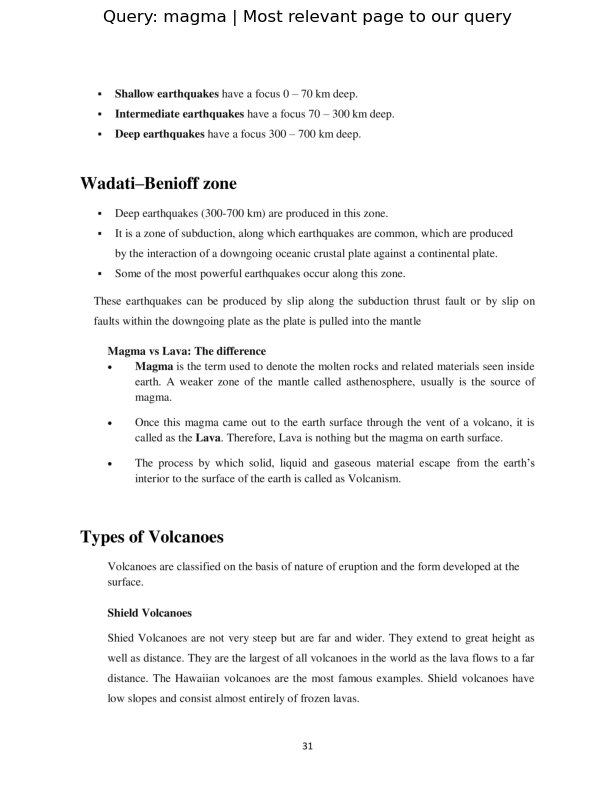

In [39]:
doc = fitz.open(pdf_path)
page = doc.load_page(30)
img = page.get_pixmap(dpi=300)
img.save("output_filename.png")
doc.close()

img_array = np.frombuffer(img.samples_mv, 
dtype=np.uint8).reshape(img.h, img.w, img.n)

import matplotlib.pyplot as plt 
plt.figure(figsize=(13,10))
plt.imshow(img_array)
plt.title(f"Query: {query} | Most relevant page to our query")
plt.axis("off")
plt.show()

Cosine Simmilarity : Vectors that are aligned in the direction have a value close to 1. 
Vectors that are opposite in direction have a value close to -1

In [40]:
# def dot_product(vector1, vector2):
#     return torch.dot(vector1, vector2)

# def cosine_simm(vector1, vector2):
#     dot_prod = torch.dot(vector1, vector2)
#     norm_vect_1 = torch.sqrt(torch.sum(vector1**2))
#     norm_vect_2 = torch.sqrt(torch.sum(vector2**2))

#     return dot_prod/ (norm_vect_1*norm_vect_2)

# vector1 = torch.tensor([1,2,3,4], dtype=torch.float32)
# vector2 = torch.tensor([1,2,3,4], dtype=torch.float32)
# vector3 = torch.tensor([-1,-2,-3,-4], dtype=torch.float32)
# vector4 = torch.tensor([9,7,5,3], dtype=torch.float32)

# print(dot_product(vector1,vector2))
# print(dot_product(vector1,vector3))
# print(dot_product(vector1,vector4))



# print(cosine_simm(vector1,vector2))
# print(cosine_simm(vector1,vector3))
# print(cosine_simm(vector1,vector4))




In [41]:
from timeit import default_timer as timer

In [42]:
def retreive_relevant_resource(query: str,
                                embeddings: torch.tensor,
                                model: SentenceTransformer=embedding_model,
                                n_resources_to_return: int=5,
                                print_time: bool=True):
            #Embed query 
            query_embedding = model.encode(query, convert_to_tensor=True)
            start_time = timer()
            dot_scores = util.dot_score(query_embedding, embeddings)[0]
            end_time = timer()

            if print_time:
                print(f"[INFO] Time taken to get scores on: ({len(embeddings)} embeddings: {end_time-start_time:.5f}) seconds.")

            scores, indices = torch.topk(input=dot_scores, k = n_resources_to_return)

            return scores, indices

def print_top_results_and_scores(query: str, 
                embeddings: torch.tensor,
                pages_and_chunks: list[dict]=pages_and_chunks,
                n_resources_to_return: int=5):
                scores , indices = retreive_relevant_resource(query=query, embeddings=embeddings, n_resources_to_return=n_resources_to_return)


LLM : Local Generation

Goes from text input to text output.

In [43]:
# Get GPU available memory 

gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes/(2**30))
print(f"Avalailable : {gpu_memory_gb}")

Avalailable : 24


In [44]:
!nvidia-smi

Tue Jul  2 17:34:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090        Off | 00000000:1A:00.0 Off |                  N/A |
| 31%   43C    P2             108W / 350W |    666MiB / 24576MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [45]:
# !pip install transformers

In [53]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available
from transformers import BitsAndBytesConfig

# Define use_quantization_config
use_quantization_config = True

# Quantization Config Creation
quantization_config = BitsAndBytesConfig(load_in_4bit=True, bnb_4bit_compute_dtype=torch.float16)

# Check for flash attention availability
torch.cuda.get_device_capability(0)[0]
if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability(0)[0] >= 8):
    attn_implementation = "flash_attention_2"
else:
    attn_implementation = "sdpa"  # scale dot product attention

model_id = "google/gemma-2-9b-it"

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)

try:
    # Load model with optional quantization config and attention implementation
    llm_model = AutoModelForCausalLM.from_pretrained(
        pretrained_model_name_or_path=model_id,
        torch_dtype=torch.float16,
        quantization_config=quantization_config if use_quantization_config else None,
        low_cpu_mem_usage=True  # Set this to True for low CPU memory usage
    )
    
    # Example usage
    input_text = "Who are you?"
    inputs = tokenizer(input_text, return_tensors="pt").to("cuda" if torch.cuda.is_available() else "cpu")
    outputs = llm_model.generate(input_ids=inputs['input_ids'], attention_mask=inputs['attention_mask'])
    print(tokenizer.decode(outputs[0], skip_special_tokens=True))

except ImportError as e:
    print("ImportError:", e)
    print("Please ensure that 'bitsandbytes' is installed and updated: pip install -U bitsandbytes")

except Exception as e:
    print("An error occurred:", e)


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

/home/jmessou/anaconda3/envs/aorta_aryan_1/lib/python3.12/site-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Who are you?

I am Gemma, an open-weights AI assistant. I am a


In [54]:
llm_model

Gemma2ForCausalLM(
  (model): Gemma2Model(
    (embed_tokens): Embedding(256000, 3584, padding_idx=0)
    (layers): ModuleList(
      (0-41): 42 x Gemma2DecoderLayer(
        (self_attn): Gemma2SdpaAttention(
          (q_proj): Linear4bit(in_features=3584, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=3584, out_features=2048, bias=False)
          (v_proj): Linear4bit(in_features=3584, out_features=2048, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=3584, bias=False)
          (rotary_emb): Gemma2RotaryEmbedding()
        )
        (mlp): Gemma2MLP(
          (gate_proj): Linear4bit(in_features=3584, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=3584, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=3584, bias=False)
          (act_fn): PytorchGELUTanh()
        )
        (input_layernorm): Gemma2RMSNorm()
        (post_attention_layernorm): Gemma2RMSN

In [55]:
def get_model_num_params(model: torch.nn.Module):
    return sum([param.numel() for param in model.parameters()])

def get_model_mem_size(model: torch.nn.Module):
    mem_params = sum([param.nelement()*param.element_size() for param in model.parameters()])
    mem_buffers = sum([buf.nelement() * buf.element_size() for buf in model.buffers()])
    model_mem_bytes = mem_params + mem_buffers
    model_meme_mb = model_mem_bytes/(1024**2)
    model_meme_gb = model_mem_bytes/(1024**3)

    return {"model_mem_bytes" : model_mem_bytes,
            "model_mem_mb" : round(model_meme_mb),
            "model_mem_gb" : round(model_meme_gb)}

get_model_num_params(llm_model)
get_model_mem_size(llm_model)


{'model_mem_bytes': 5998039040, 'model_mem_mb': 5720, 'model_mem_gb': 6}

GENERATING TEXT WITH LLM

In [56]:
input_text = "Tell me about rivers:"
print(f"Input Text: \n{input_text}")
#prompt template ::::::

dialogue_template =[ 
    {"role":"user",
    "content":input_text}]

prompt = tokenizer.apply_chat_template(conversation=dialogue_template, tokenize=False, add_generation_prompt=True)
print(f"\nPrompt (formatted):\n{prompt}")



Input Text: 
Tell me about rivers:

Prompt (formatted):
<bos><start_of_turn>user
Tell me about rivers:<end_of_turn>
<start_of_turn>model



In [60]:
input_text = "Tell me about potatoes:"

print(f"Input text:\n{input_text}")

# Create prompt template for instruction-tuned model
dialogue_template = [
    {"role": "user",
     "content": input_text}
]

# Apply the chat template
prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                       tokenize=False, # keep as raw text (not tokenized)
                                       add_generation_prompt=True)
print(f"\nPrompt (formatted):\n{prompt}")


Input text:
Tell me about potatoes:

Prompt (formatted):
<bos><start_of_turn>user
Tell me about potatoes:<end_of_turn>
<start_of_turn>model



In [61]:
input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

outputs = llm_model.generate(**input_ids,max_new_tokens=256)
# Turn the output tokens into text

print(f"RAG answer:\n{outputs}")

RAG answer:
tensor([[     2,      2,    106,   1645,    108,  27445,    682,   1105,  25741,
         235292,    107,    108,    106,   2516,    108,   1620,    139, 235280,
          20555,  95672,   1280,    573, 143918,  67031, 235248, 246776,    109,
            651,  28251, 235269,    476,  64965,   2960,    604,  62062,  20455,
         235269,    603,    476,  36726,  30434,    675,    476,   7277,   4281,
            578,  20016,  84285, 235265, 235248,    109,    688,  92567,    578,
           7874,  66058,    109, 235287,   5231,  26850,    577,    573,  89657,
          66058,  94036,  52102,    575,    573,   1536, 120169,    576,    573,
          89657,  34309,    575,   4316,   5783, 235269,   1570,    984,   1049,
          44169,    731,  41660,  29691,    604,  13669,    576,   1658, 235265,
            108, 235287,   5231,  11195,  53894,  66058,    139,  51590,  63020,
          62600,  11261,  25741,    577,   4238,    575,    573, 235248, 235274,
         235318,

In [62]:
# Decode the poutput tokens to text

outputs_decoded = tokenizer.decode(outputs[0])
print(f"ModelOutput (decoded) : \n{outputs_decoded}")

ModelOutput (decoded) : 
<bos><bos><start_of_turn>user
Tell me about potatoes:<end_of_turn>
<start_of_turn>model
##  A Deep Dive into the Humble Potato 🥔

The potato, a staple food for billions worldwide, is a fascinating tuber with a rich history and surprising versatility. 

**Origins and History:**

* **Native to the Andes:** Potatoes originated in the high altitudes of the Andes Mountains in South America, where they were cultivated by indigenous peoples for thousands of years.
* **Global Spread:**  Spanish conquistadors introduced potatoes to Europe in the 16th century, where they initially faced skepticism. 
* **Irish Connection:** Potatoes became a crucial food source in Ireland, leading to the devastating potato famine in the 19th century.
* **Modern Staple:** Today, potatoes are grown worldwide and are a key ingredient in countless cuisines.

**Botany and Cultivation:**

* **Tubers:** Potatoes are actually underground stems called tubers, which store nutrients for the plant.
*

In [74]:
query_list = [
    "what is magma?",
    "what is a hill?",
    "How does wind affect soil erosion?",
    "what is the longets river in the world?"
]

import random 
query = random.choice(query_list)
print(f"Query: {query}")

scores, indices = retreive_relevant_resource(query=query, embeddings=embeddings)
scores, indices


Query: How does wind affect soil erosion?
[INFO] Time taken to get scores on: (249 embeddings: 0.00011) seconds.


(tensor([0.5624, 0.5613, 0.5102, 0.5007, 0.4904], device='cuda:0'),
 tensor([ 99,  43,  81, 212,  78], device='cuda:0'))

Augmenting our prompt with context items:

In [75]:
def prompt_formatter(query:str, context_items:list[dict]) -> str:
    context = "- " + "\n".join([item["sentence_chunk"]for item in context_items])
    prompt = context
    return prompt

query = random.choice(query_list)
print(f"Query : {query}")

scores, indices = retreive_relevant_resource(query=query, embeddings=embeddings)

context_items = [pages_and_chunks[i] for i in indices]

prompt = prompt_formatter(query=query,
                          context_items=context_items)

print(prompt)

Query : what is a hill?
[INFO] Time taken to get scores on: (249 embeddings: 0.00008) seconds.
- 36 9. Concepts of geomorphic cycles and Landscape development Many of us love visiting hill stations for vacations. It is a balm for the tired soul and does wonders for the mind. Some of us might love trekking up mountains and settling down on the top to either view sunrise or sunset or just stare in awe at the magnificent landscape all around. Have we ever looked at those fascinating mountains or the green plains and wondered how they might have been formed?Certainly, the process would not be simple!Set by William M. Davis, the theory of the geomorphic cycle tries to tell us how terrains are developed across landscapes. The model involves explanations for many different structures such as hilltops, valleys, mountains, and rivers. Because it describes the processes of erosion and deposition which eventually lead to relief or terrain formation, it is also known as the cycle of erosion or the